In [47]:
import os
import pandas as pd
from pathlib import Path
import csv

In [54]:
# import Clean Bitcoin, facebook, amazon, apple, netflix, google, gold and vnq Data

bitcoin_df = pd.read_csv("../Data/clean/bitcoin.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)['2019-10-29' : '2020-10-28']

facebook_df = pd.read_csv("../Data/clean/facebook.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)

amazon_df = pd.read_csv("../Data/clean/amazon.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)

apple_df = pd.read_csv("../Data/clean/apple.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)

netflix_df = pd.read_csv("../Data/clean/netflix.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)

google_df = pd.read_csv("../Data/clean/google.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)

gold_df = pd.read_csv("../Data/clean/gold.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)

sp500_df = pd.read_csv("../Data/clean/sp500.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)

vnq_df = pd.read_csv("../Data/clean/vnq.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)


In [56]:
# Slice gold, sp500 & vnq data for desired date range of 2019-10-29 to 2020-10-28

gold_df_data = gold_df.sort_index(ascending=True)['2019-10-29' : '2020-10-28']

sp500_df_data = sp500_df.sort_index(ascending=True)['2019-10-29' : '2020-10-28']

vnq_df_data = vnq_df.sort_index(ascending=True)['2019-10-29' : '2020-10-28']


In [37]:
# Change Close column names to stock tickers

facebook_df_col = facebook_df.rename(columns = {"Close" : "FB"})
amazon_df_col = amazon_df.rename(columns = {"Close" : "AMZN"})
apple_df_col = apple_df.rename(columns = {"Close" : "AAPLE"})
netflix_df_col = netflix_df.rename(columns = {"Close" : "NFLX"})
google_df_col = google_df.rename(columns = {"Close" : "GOOGL"})

In [38]:
faang_df = pd.concat([facebook_df_col, amazon_df_col, apple_df_col, netflix_df_col, google_df_col], axis="columns", join="inner")

faang_df.head()

,FB,AMZN,AAPLE,NFLX,GOOGL
Date,,,,,
2019-10-29,189.31,1762.71,60.82,281.21,1260.66
2019-10-30,188.25,1779.99,60.82,291.45,1260.70
2019-10-31,191.65,1776.66,62.19,287.41,1258.80
2019-11-01,193.62,1791.44,63.96,286.81,1272.25
2019-11-04,194.72,1804.66,64.38,292.86,1289.61


In [39]:
faang_daily_change = faang_df.pct_change()
faang_price_change = faang_daily_change.dropna()
faang_price_change.head()

,FB,AMZN,AAPLE,NFLX,GOOGL
Date,,,,,
2019-10-30,-0.005599,0.009803,0.000000,0.036414,0.000032
2019-10-31,0.018061,-0.001871,0.022525,-0.013862,-0.001507
2019-11-01,0.010279,0.008319,0.028461,-0.002088,0.010685
2019-11-04,0.005681,0.007380,0.006567,0.021094,0.013645
2019-11-05,-0.002054,-0.001635,-0.001553,-0.016493,0.001419


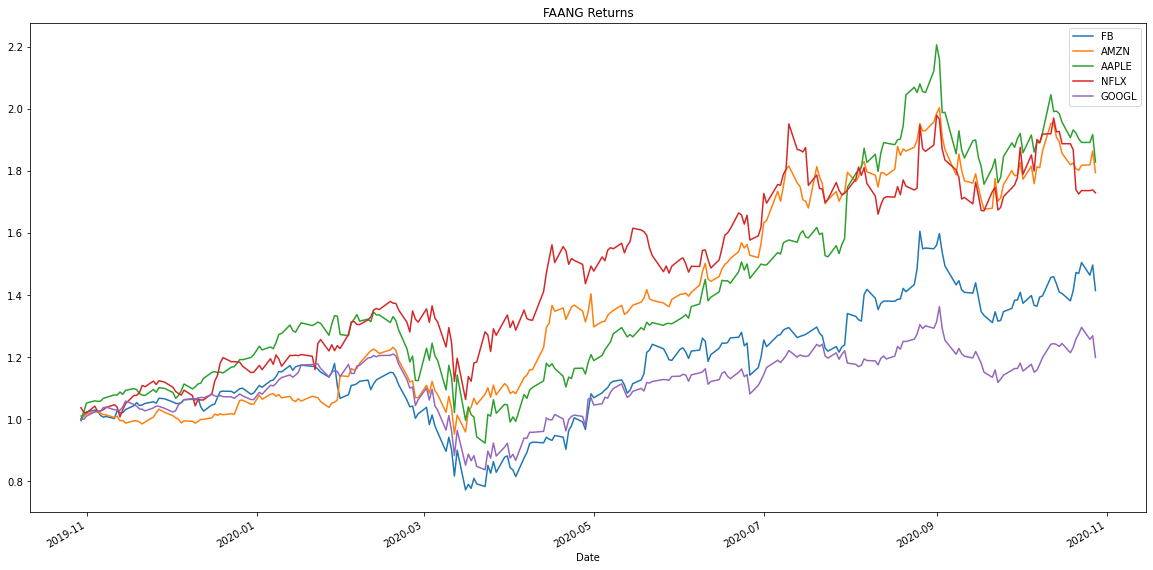

In [40]:
cum_faang_returns = (1 + faang_price_change).cumprod()
cum_faang_returns.plot(figsize = (20,10), title = "FAANG Returns")

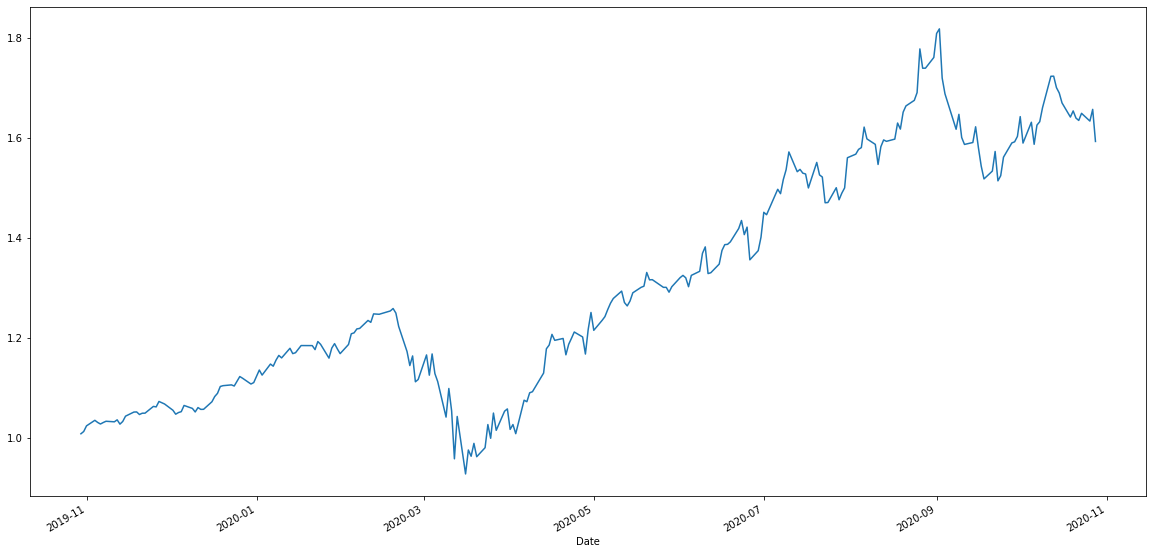

In [41]:
# Assign weights to portfolio stocks
faang_weights = [.2, .2, .2, .2, .2]

faang_returns = cum_faang_returns.dot(faang_weights)

faang_returns.plot(figsize = (20, 10))

In [42]:
# Calculate Bitcoin daily returns
btc_returns = bitcoin_df.pct_change().dropna()

btc_returns.head()

,BITCOIN
Date,
2019-10-30,-0.026925
2019-10-31,-0.000579
2019-11-01,0.008468
2019-11-02,0.007638
2019-11-03,-0.010999


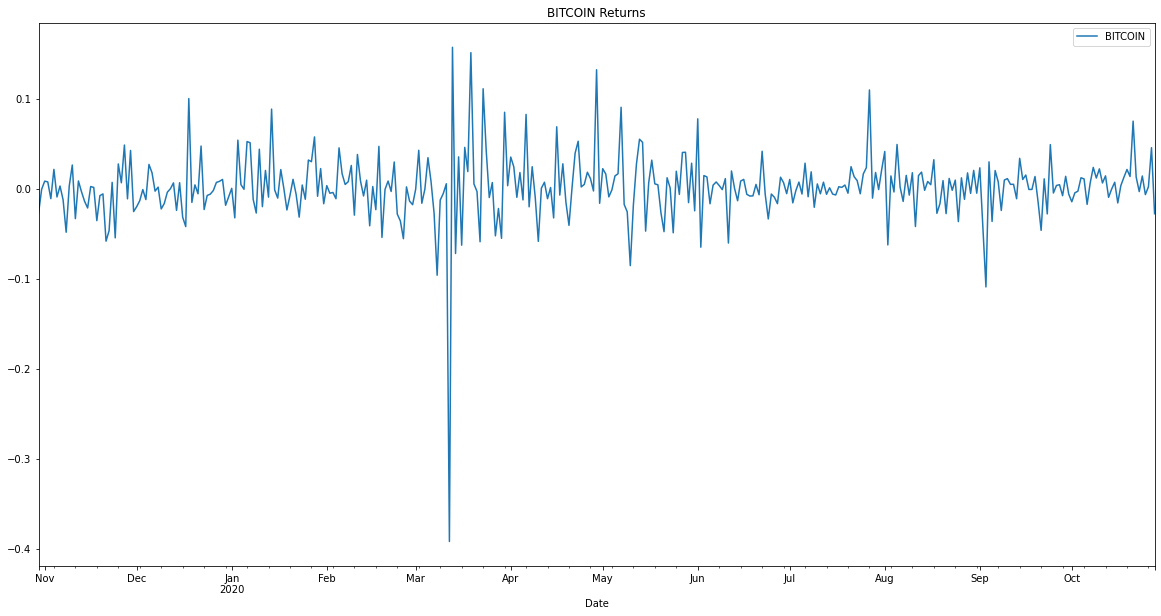

In [43]:
btc_returns.plot(figsize = (20 , 10), title = "BITCOIN Returns")

In [58]:
# Calculate Gold daily returns
gold_returns = gold_df_data.pct_change().dropna()

gold_returns.head()

,GOLD
Date,
2019-10-30,0.003880
2019-10-31,0.011464
2019-11-01,-0.001749
2019-11-04,0.000195
2019-11-05,-0.017579


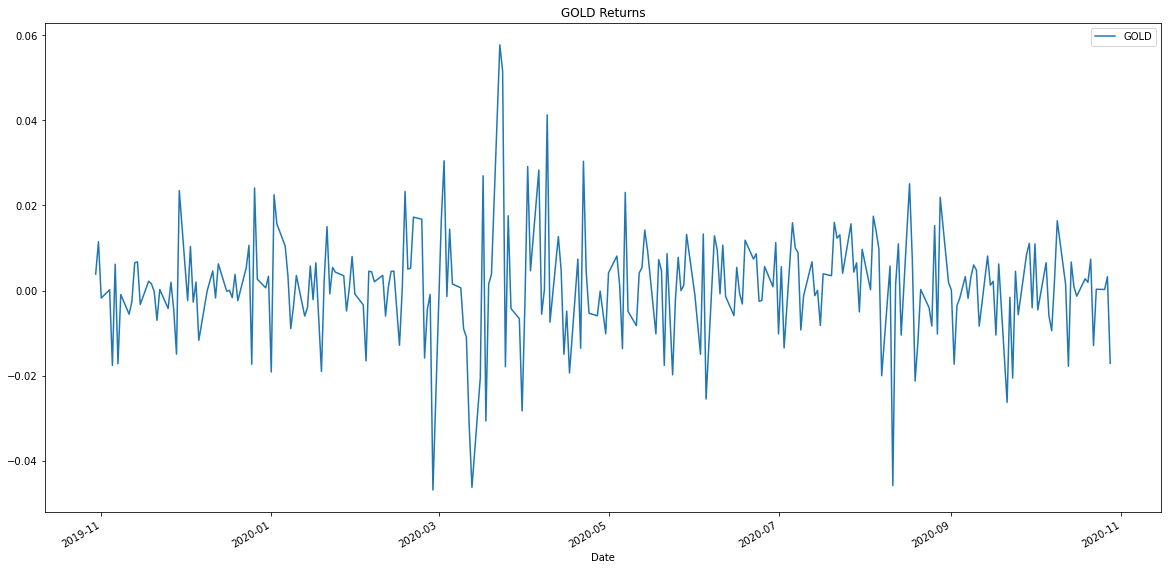

In [60]:
gold_returns.plot(figsize = (20, 10), title = "GOLD Returns")

In [61]:
# Calculate S&P 500 daily returns
sp500_returns = sp500_df_data.pct_change().dropna()

sp500_returns.head()


,sp500
Date,
2019-10-30,0.003253
2019-10-31,-0.003023
2019-11-01,0.009662
2019-11-04,0.003704
2019-11-05,-0.001186


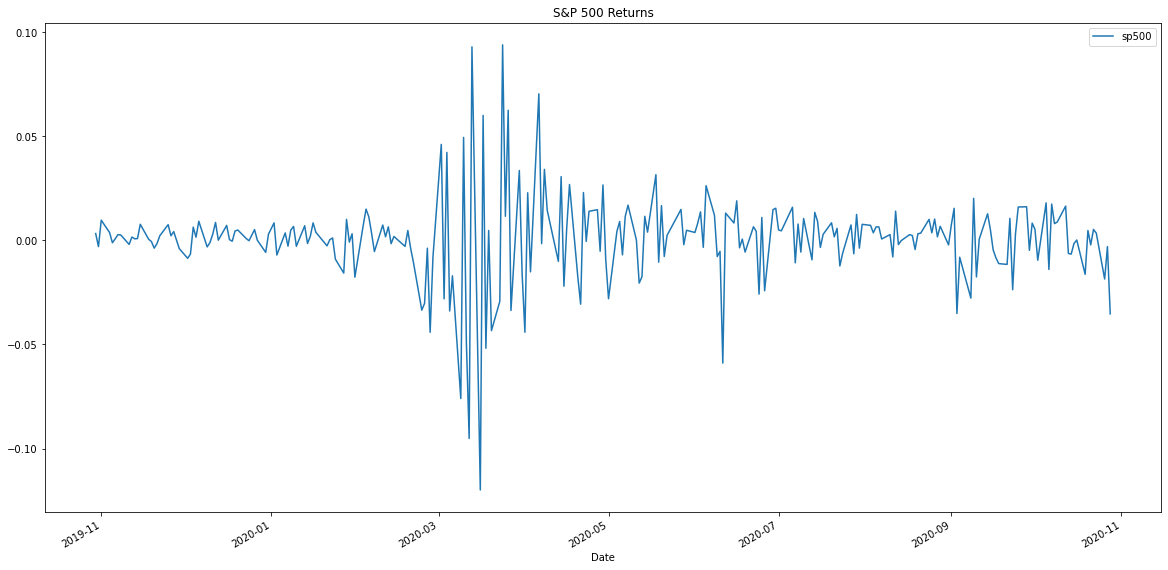

In [62]:
sp500_returns.plot(figsize = (20 ,10), title = "S&P 500 Returns")

In [63]:
# Calculate VNQ daily returns
vnq_returns = vnq_df_data.pct_change().dropna()

vnq_returns.head()

,VNQ
Date,
2019-10-30,0.003612
2019-10-31,-0.001800
2019-11-01,-0.000212
2019-11-04,-0.007000
2019-11-05,-0.016984


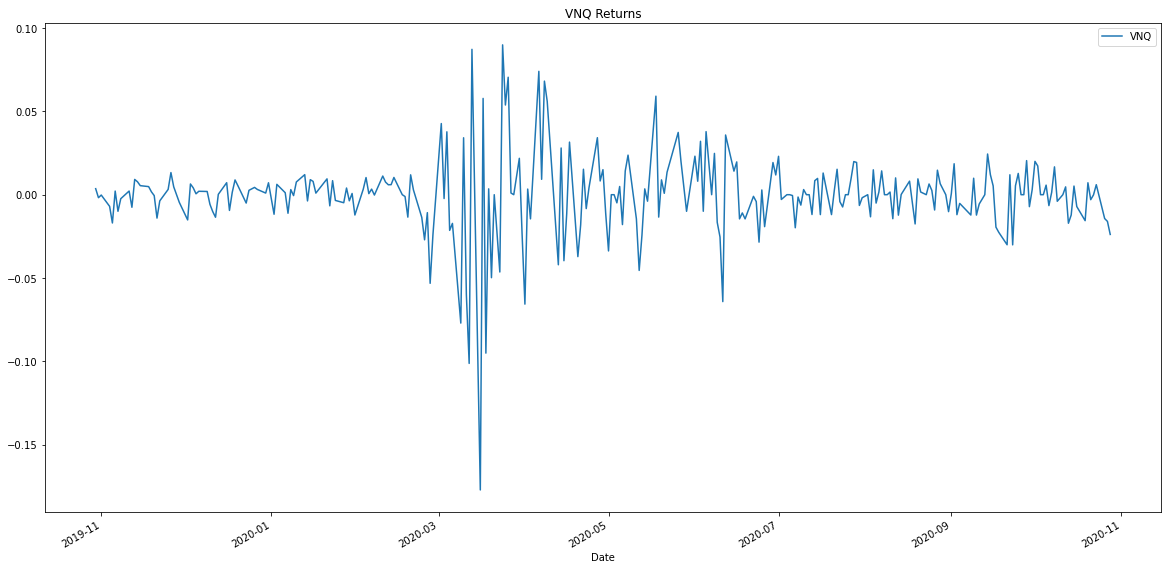

In [64]:
vnq_returns.plot(figsize = (20, 10), title = "VNQ Returns")